# rdpg_corr function

In [1]:
import numpy as np
from rdpg_corr import rdpg_corr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# property: correlation

In [2]:
import numpy as np
import warnings

In [3]:
np.random.seed(1234)
X = np.random.dirichlet([20, 20], size=100)
Y = None
r=0.3
#rdpg_corr(X,Y,r, rescale=False, directed=False, loops=False)

In [4]:
def cal_rho(X,Y,r,n):
    folder1=[]
    folder2=[]
    correlation=[]
    for j in range(n):
        g1, g2 = rdpg_corr(X,Y,r, rescale=False, directed=False, loops=False)
        g1 = g1[np.where(~np.eye(g1.shape[0], dtype=bool))] #remove diagnal elements
        g2 = g2[np.where(~np.eye(g2.shape[0], dtype=bool))]
        folder1.append(g1)
        folder2.append(g2)
    folder1=np.mat(folder1)
    folder2=np.mat(folder2)
    # here, each column of folder1 and folder2 represents the same edge

    for i in range(g1.size):
        cor=np.corrcoef(folder1[:,i].T,folder2[:,i].T)[0,1]
        correlation.append(cor)
    correlation=list(correlation)
    return correlation

In [18]:
r0=cal_rho(X,Y,0.0,100)
r1=cal_rho(X,Y,0.1,100)
r2=cal_rho(X,Y,0.2,100)
r3=cal_rho(X,Y,0.3,100)
r4=cal_rho(X,Y,0.4,100)
r5=cal_rho(X,Y,0.5,100)
r6=cal_rho(X,Y,0.6,100)
r7=cal_rho(X,Y,0.7,100)
r8=cal_rho(X,Y,0.8,100)
r9=cal_rho(X,Y,0.9,100)

In [19]:
r_1=cal_rho(X,Y,-0.1,100)
r_2=cal_rho(X,Y,-0.2,100)
r_3=cal_rho(X,Y,-0.3,100)
r_4=cal_rho(X,Y,-0.4,100)
r_5=cal_rho(X,Y,-0.5,100)
r_6=cal_rho(X,Y,-0.6,100)

In [20]:
all_means=[]
all_means.append(np.mean(r_6))
all_means.append(np.mean(r_5))
all_means.append(np.mean(r_4))
all_means.append(np.mean(r_3))
all_means.append(np.mean(r_2))
all_means.append(np.mean(r_1))
all_means.append(np.mean(r0))
all_means.append(np.mean(r1))
all_means.append(np.mean(r2))
all_means.append(np.mean(r3))
all_means.append(np.mean(r4))
all_means.append(np.mean(r5))
all_means.append(np.mean(r6))
all_means.append(np.mean(r7))
all_means.append(np.mean(r8))
all_means.append(np.mean(r9))
all_means

[-0.598037738857122,
 -0.5003346667873758,
 -0.40098476988101245,
 -0.2995863904530781,
 -0.20100028105895562,
 -0.09941330553667858,
 0.0006275202115119677,
 0.09936303574950203,
 0.20142774587287288,
 0.3009579295336786,
 0.3994741974945711,
 0.5011551547195363,
 0.5992109012894961,
 0.6987361221048083,
 0.7994144242146923,
 0.8991568679528802]

In [21]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/mac/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 1.0, 'Contrast between expected and calculated rho')

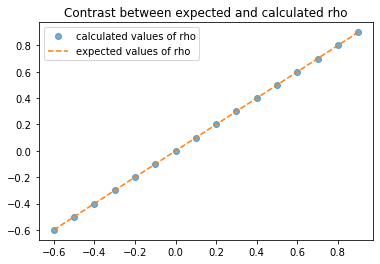

In [22]:
x_list = np.linspace(-0.6,0.9,16)

l1, = plt.plot(x_list,all_means,'o',label='calculated values of rho',alpha=0.6)
l2, = plt.plot(x_list,x_list, linestyle='--',label='expected values of rho')
plt.legend(loc='upper left')
plt.title('Contrast between expected and calculated rho')

In [25]:
def corrplot(corrs, rho, i, title=None):
    if title is None:
        title = f"Expected correlation = {rho:0.2f}"
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.distplot(corrs, ax=ax)
    ax.axvline(rho, c="green", label="Expected")
    ax.axvline(all_means[i], c="red", label="Empirical")
    ax.set_xlabel("Correlation")
    ax.legend()
    ax.set_title(title)
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])

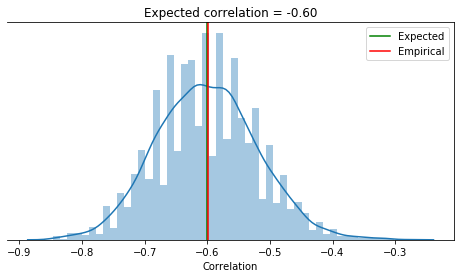

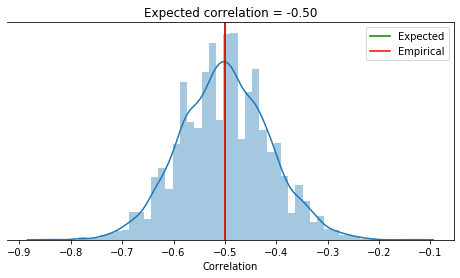

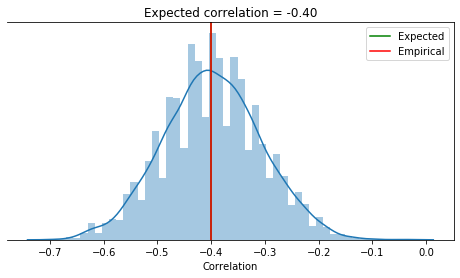

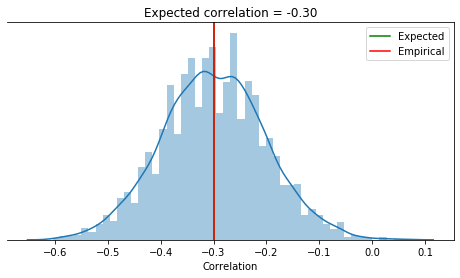

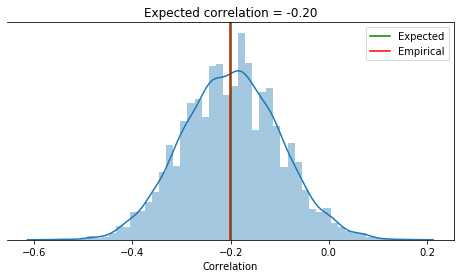

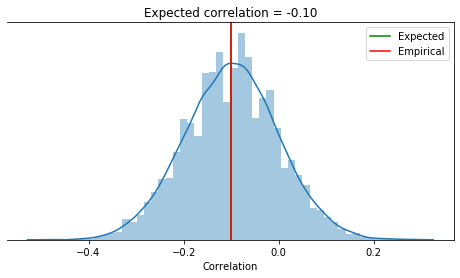

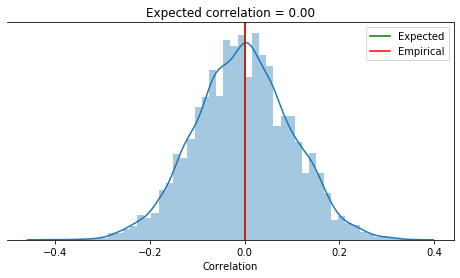

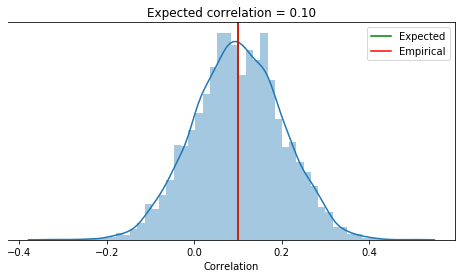

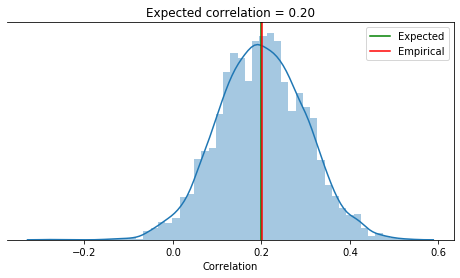

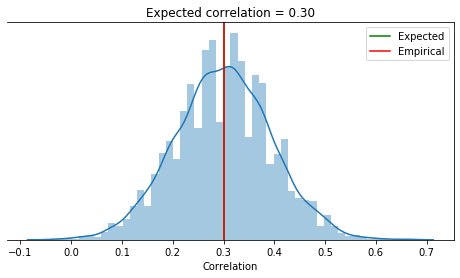

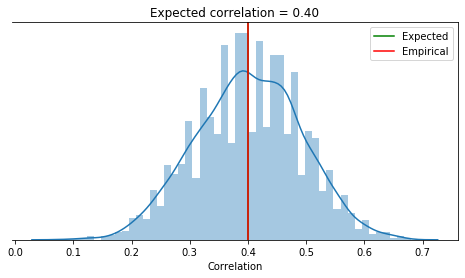

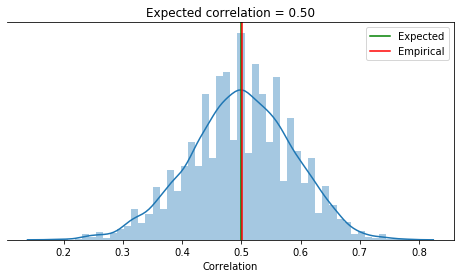

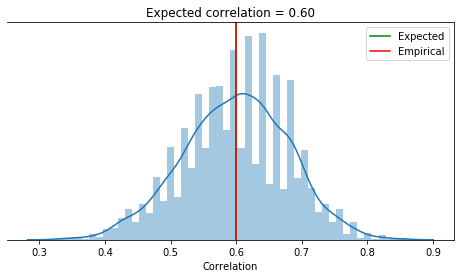

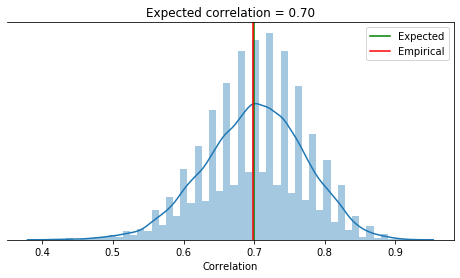

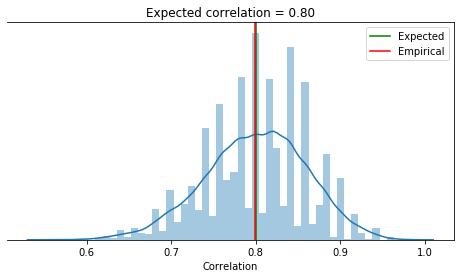

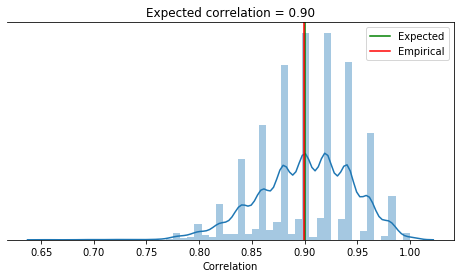

In [32]:
rhos = np.linspace(-0.6, 0.9, 16) 
all_cors=[]
n_sims=100

for i, rho in enumerate(rhos):
    corrs=np.empty(len(rhos))
    for j in range(n_sims):
        corrs=cal_rho(X,Y,rhos[i],n_sims)
        all_cors.append(corrs)
    corrplot(corrs,rho,i)

In [41]:
all_cors=np.reshape(all_cors,(16,990000))
np.shape(all_cors)

(16, 990000)

Text(0.5, 1.0, 'Correlation for rho-RDPG')

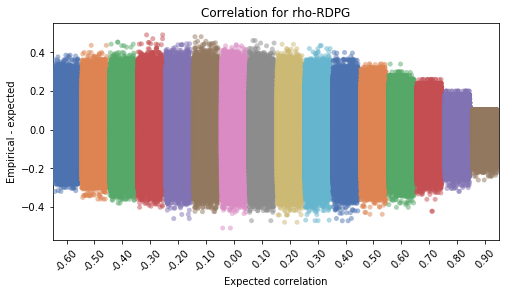

In [42]:
dfs = []
for i, corrs in enumerate(all_cors):
    temp_df = pd.DataFrame()
    ecorr = rhos[i]
    temp_df["Empirical - expected"] = corrs - ecorr
    temp_df["Expected correlation"] = ecorr
    dfs.append(temp_df)
corr_df = pd.concat(dfs, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.stripplot(
    data=corr_df,
    x="Expected correlation",
    y="Empirical - expected",
    ax=ax,
    alpha=0.5,
    jitter=0.45,
    palette="deep",
)
plt.xticks(rotation=45)
ticklabels = np.vectorize(lambda x: f"{x:0.2f}")(rhos)
ax.xaxis.set_major_formatter(plt.FixedFormatter(ticklabels))
ax.axhline(0, color="grey", linestyle="--", alpha=1)
ax.set_title("Correlation for rho-RDPG")